In [1]:
#warm up

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

In [4]:
dataset.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [5]:
dataset['Interest.Rate'][:5]

81174     8.90%
99592    12.12%
80059    21.98%
15825     9.99%
33182    11.71%
Name: Interest.Rate, dtype: object

In [6]:
dataset['Loan.Length'][:5]

81174    36 months
99592    36 months
80059    60 months
15825    36 months
33182    36 months
Name: Loan.Length, dtype: object

In [7]:
#remove %sign in rate 
dataset['Interest.Rate'].isnull().any()
dataset['Interest.Rate'].str.replace('%','')[:5]

81174     8.90
99592    12.12
80059    21.98
15825     9.99
33182    11.71
Name: Interest.Rate, dtype: object

In [8]:
#remove months in loan
dataset['Loan.Length'].str.replace('months','')[:5]

81174    36 
99592    36 
80059    60 
15825    36 
33182    36 
Name: Loan.Length, dtype: object

In [9]:
dataset['Interest.Rate'].apply(lambda x:x.replace('%',''))[:5]

81174     8.90
99592    12.12
80059    21.98
15825     9.99
33182    11.71
Name: Interest.Rate, dtype: object

In [10]:
%timeit dataset['Interest.Rate'].str.replace('%','')[:5]

1.95 ms ± 381 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
%timeit dataset['Interest.Rate'].apply(lambda x:x.replace('%',''))[:5]

1.73 ms ± 245 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
dataset.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [13]:
outlier=dataset[dataset['Monthly.Income']>100000]
outlier

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
54487,33000,33000.0,7.62%,36 months,debt_consolidation,0.26%,NY,MORTGAGE,102750.0,805-809,7.0,95435.0,0.0,10+ years


In [14]:
dataset.isnull().any()

Amount.Requested                  False
Amount.Funded.By.Investors        False
Interest.Rate                     False
Loan.Length                       False
Loan.Purpose                      False
Debt.To.Income.Ratio              False
State                             False
Home.Ownership                    False
Monthly.Income                     True
FICO.Range                        False
Open.CREDIT.Lines                  True
Revolving.CREDIT.Balance           True
Inquiries.in.the.Last.6.Months     True
Employment.Length                  True
dtype: bool

In [15]:
dataset=dataset.dropna()#remove rows with null values

In [16]:
dataset.isnull().any()#checking it

Amount.Requested                  False
Amount.Funded.By.Investors        False
Interest.Rate                     False
Loan.Length                       False
Loan.Purpose                      False
Debt.To.Income.Ratio              False
State                             False
Home.Ownership                    False
Monthly.Income                    False
FICO.Range                        False
Open.CREDIT.Lines                 False
Revolving.CREDIT.Balance          False
Inquiries.in.the.Last.6.Months    False
Employment.Length                 False
dtype: bool

In [17]:
#removing outliers
dataset=dataset[dataset['Monthly.Income'].apply(lambda x:x<100000)]
dataset[45:50]

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
14958,5000,5000.0,11.86%,36 months,major_purchase,4%,TX,RENT,5577.00,715-719,3.0,1069.0,0.0,1 year
14754,3000,3000.0,10.38%,36 months,debt_consolidation,15.21%,PA,RENT,3083.33,710-714,11.0,3098.0,0.0,2 years
34501,20000,19975.0,23.91%,60 months,debt_consolidation,9.47%,CA,MORTGAGE,11250.00,670-674,5.0,11168.0,0.0,< 1 year
26888,5450,5450.0,7.49%,60 months,other,2.48%,WA,MORTGAGE,4600.00,785-789,14.0,4326.0,0.0,10+ years
81759,14000,14000.0,12.12%,36 months,debt_consolidation,11.38%,NY,MORTGAGE,4500.00,705-709,22.0,18583.0,0.0,5 years


In [18]:
dataset.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [19]:
#removing % from Interest.Rate
dataset['Interest.Rate']=dataset['Interest.Rate'].apply(lambda x:x.replace('%',''))
dataset.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [20]:
dataset['Loan.Length']=dataset['Loan.Length'].apply(lambda x:x.strip('months'))

In [21]:
dataset.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [22]:
#ploting Interest Rate and loan length

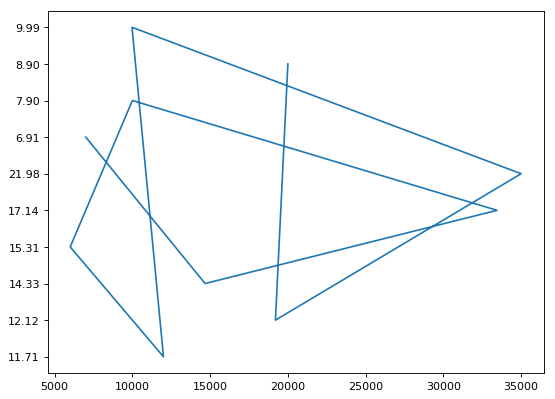

In [23]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(dataset['Amount.Funded.By.Investors'][:10],dataset['Interest.Rate'][:10],'-')
plt.show()

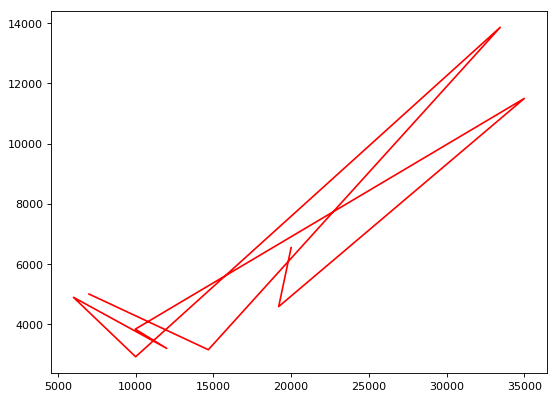

In [24]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(dataset['Amount.Funded.By.Investors'][:10],dataset['Monthly.Income'][:10],'r-')
plt.show()

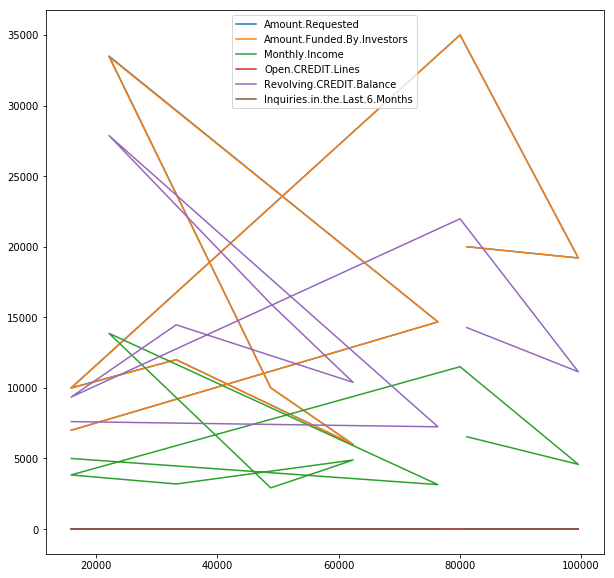

In [25]:

dataset[:10].plot(figsize=(10,10))


In [26]:
y=dataset['FICO.Range'].apply(lambda x:pd.Series(str(x).split('-')))

In [27]:
y=y.astype(int)

In [28]:
dataset['FICO.Score']=(y[0]+y[1])/2

In [29]:
dataset.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Score
81174,20000,20000.0,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,737.0
99592,19200,19200.0,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,717.0
80059,35000,35000.0,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years,692.0
15825,10000,9975.0,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years,697.0
33182,12000,12000.0,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years,697.0


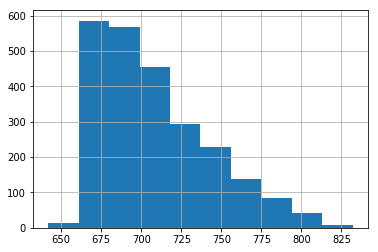

In [30]:
dataset['FICO.Score'].hist()

Text(0.5,1,'                          ')

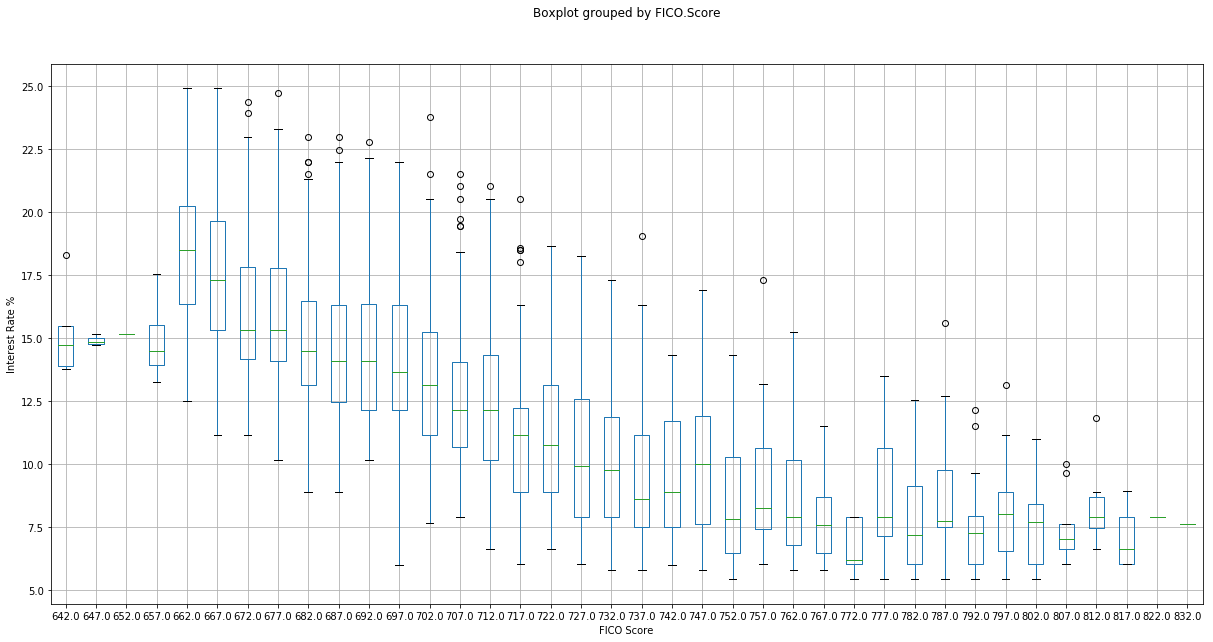

In [31]:
plt.figure(figsize=(20,20),dpi=80)
dataset['Interest.Rate']=dataset['Interest.Rate'].astype(float)
dataset.boxplot('Interest.Rate','FICO.Score',figsize=(20,10),grid=True)
# q = plt.set_xticklabels
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate %')
plt.title('                          ')


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002323B198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000022ED7780>]], dtype=object)

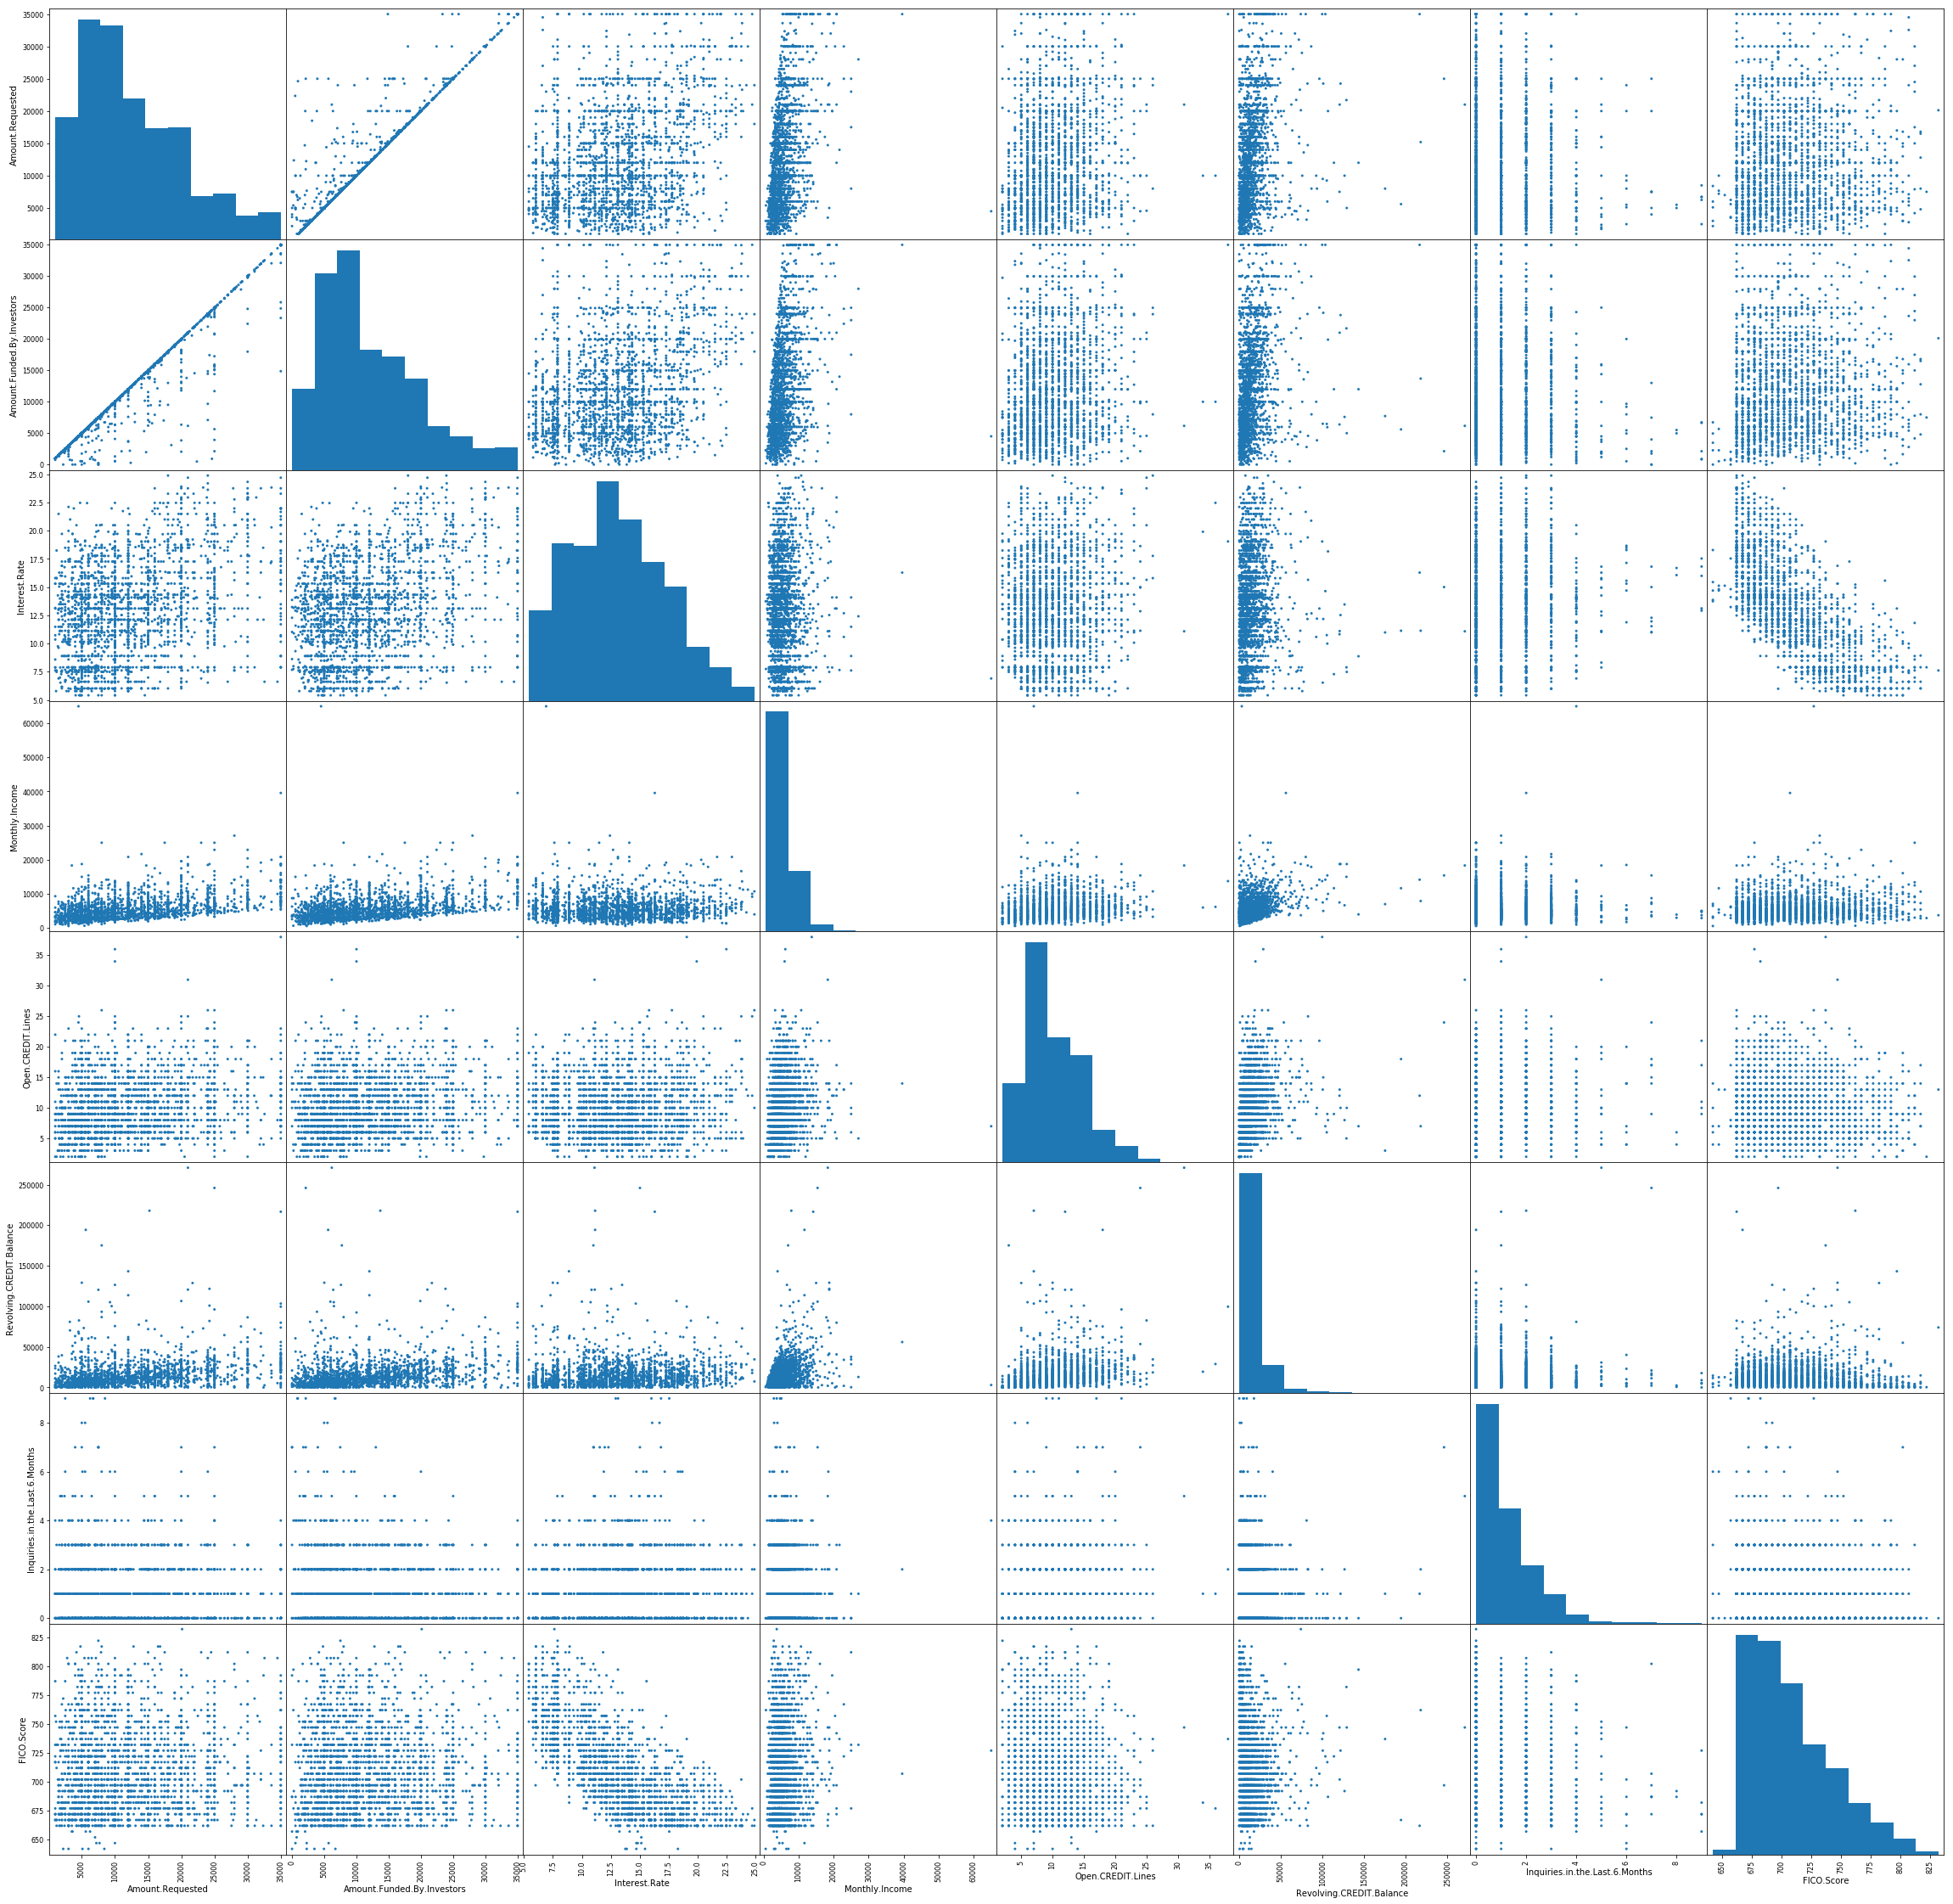

In [44]:
pd.scatter_matrix(dataset,figsize=(40,40),alpha=1)

#### investigation shows that interest rate depend some how on ficoscore and loan amount
### InterestRate =a0 +a1.FICOScore+a2.LoanAmount

In [59]:
x=dataset.iloc[:,[8,14]].values
y=dataset.iloc[:,[2]].values

In [60]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [61]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
sc_y=StandardScaler()
y_train =sc_y.fit_transform(y_train)

In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
y_pred = regressor.predict(x_test)

In [74]:
regressor.score(x_test,y_test) #so worse model because it is highly negative

-9.8173714216237276